# Monthly Forecast

In [1]:
# Required imports
import pandas as pd
import matplotlib.pyplot as plt

# Modeling Package
from neuralprophet import NeuralProphet

In [2]:
df = pd.read_csv('monthly10.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 0 to 831
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      832 non-null    object 
 1   y       832 non-null    float64
dtypes: float64(1), object(1)
memory usage: 19.5+ KB


In [5]:
df.head()

,ds,y
0,1953-04-01,2.83
1,1953-05-01,3.05
2,1953-06-01,3.11
3,1953-07-01,2.93
4,1953-08-01,2.95


In [6]:
df.tail()

,ds,y
827,2022-03-01,2.13
828,2022-04-01,2.75
829,2022-05-01,2.90
830,2022-06-01,3.14
831,2022-07-01,2.90


In [7]:
df.describe()

,y
count,832.000000
mean,5.604531
std,2.927294
min,0.620000
25%,3.450000
50%,5.015000
75%,7.402500
max,15.320000


In [8]:
m = NeuralProphet(
    n_changepoints=12, 
    num_hidden_layers=2)    

In [9]:
metrics = m.fit(df, freq="M")

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 206


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.55E-01, min: 7.14E-02


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.94E-01, min: 7.14E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.07E-01
Epoch[206/206]: 100%|█| 206/206 [00:11<00:00, 17.53it/s, SmoothL1Loss=0.00191, M


In [10]:
future = m.make_future_dataframe(df=df, periods=12)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M


In [11]:
forecast = m.predict(df=future)

INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to 83.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to 83.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M


In [12]:
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly
0,2022-07-31,None,1.665097,NaN,1.617025,0.048072
1,2022-08-31,None,1.569221,NaN,1.608858,-0.039637
2,2022-09-30,None,1.578929,NaN,1.600953,-0.022025
3,2022-10-31,None,1.516763,NaN,1.592786,-0.076023
4,2022-11-30,None,1.511492,NaN,1.584881,-0.073390


### Plotting

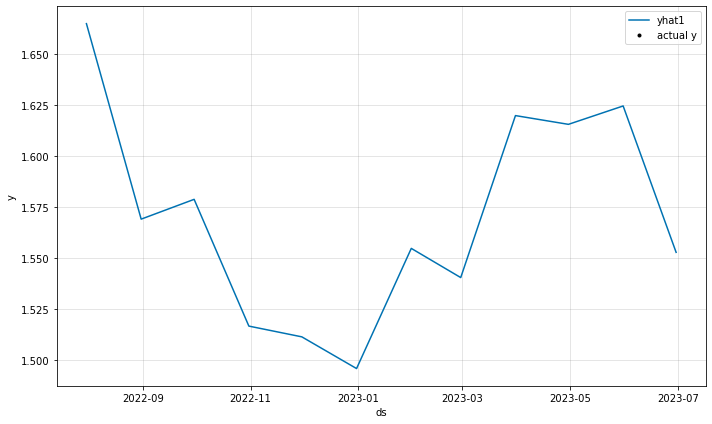

In [13]:
fig_forecast = m.plot(forecast)

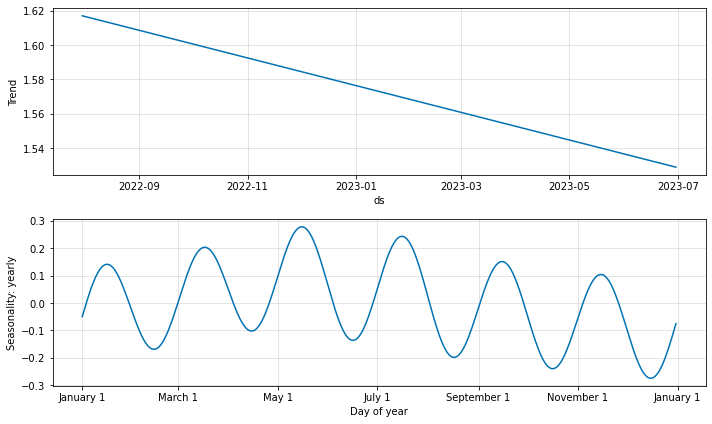

In [14]:
fig_comp = m.plot_components(forecast)

#### February, April, June, August, October, and December has downward seasonality.

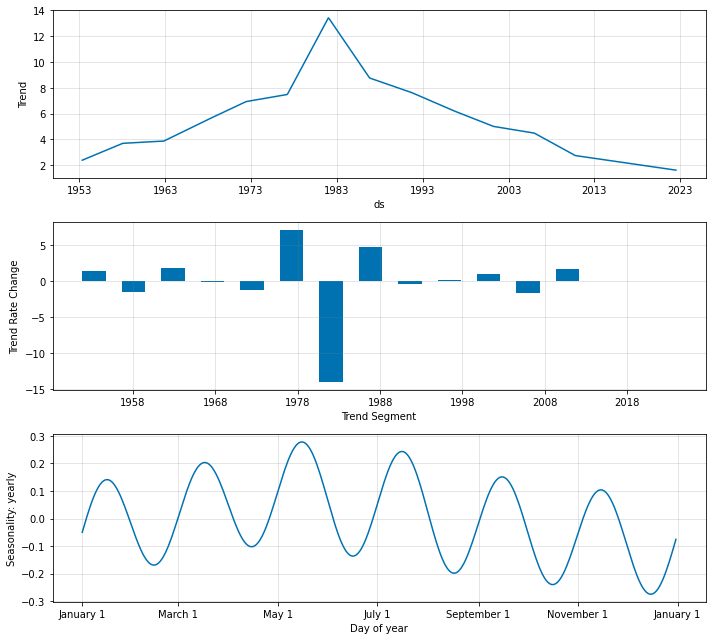

In [15]:
fig_param = m.plot_parameters()

## Validation

In [16]:
# Manual Split
m = NeuralProphet()
df_train, df_test = m.split_df(df, valid_p=0.2)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.587% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS


In [17]:
train_metrics = m.fit(df_train)
test_metrics = m.test(df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 222


  0%|          | 0/122 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.27E-01, min: 1.06E-01


  0%|          | 0/122 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.27E-01, min: 8.92E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.09E-01
Epoch[222/222]: 100%|█| 222/222 [00:10<00:00, 21.25it/s, SmoothL1Loss=0.00402, M
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.964% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.003  0.596  0.747


In [18]:
# Builtin Function

m = NeuralProphet()
metrics = m.fit(df_train, validation_df=df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.592% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 222


  0%|          | 0/122 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.06E-01, min: 8.27E-01


  0%|          | 0/122 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.06E-01, min: 8.27E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.04E-01
Epoch[222/222]: 100%|█| 222/222 [00:10<00:00, 21.18it/s, SmoothL1Loss=0.00402, M


Text(0.5, 1.0, 'Model Loss (MAE) with Monthly Frequency')

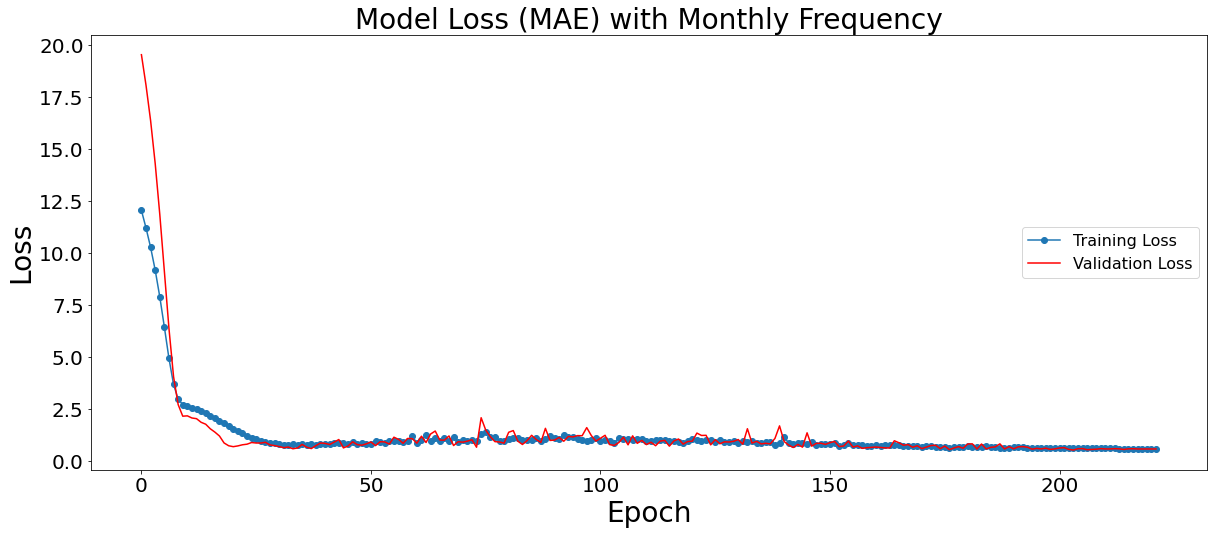

In [19]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(metrics["MAE"], '-o', label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', label="Validation Loss")
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28)
ax.set_ylabel("Loss", fontsize=28)
ax.set_title("Model Loss (MAE) with Monthly Frequency", fontsize=28)